# Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer




# Dataset

In [10]:
Data = pd.read_csv("heart_disease_uci.csv")
Data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# Clean the Dataset

In [15]:
# Check for missing values

print(Data.isnull().sum())

# Drop duplicates if any

Data.drop_duplicates(inplace=True)


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


# Exploratory Data Analysis

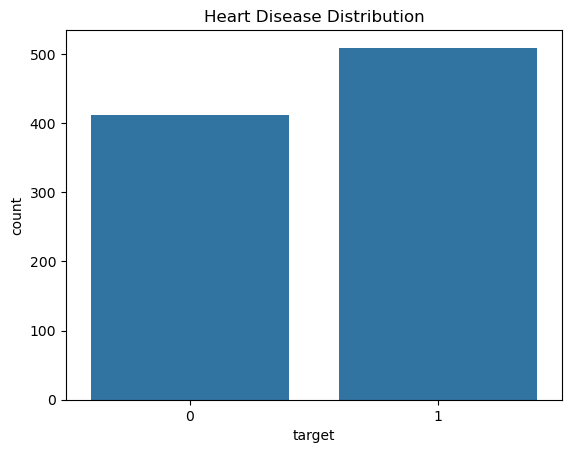

In [40]:
# Class Balance

sns.countplot(x='target', data=Data)
plt.title('Heart Disease Distribution')
plt.show()



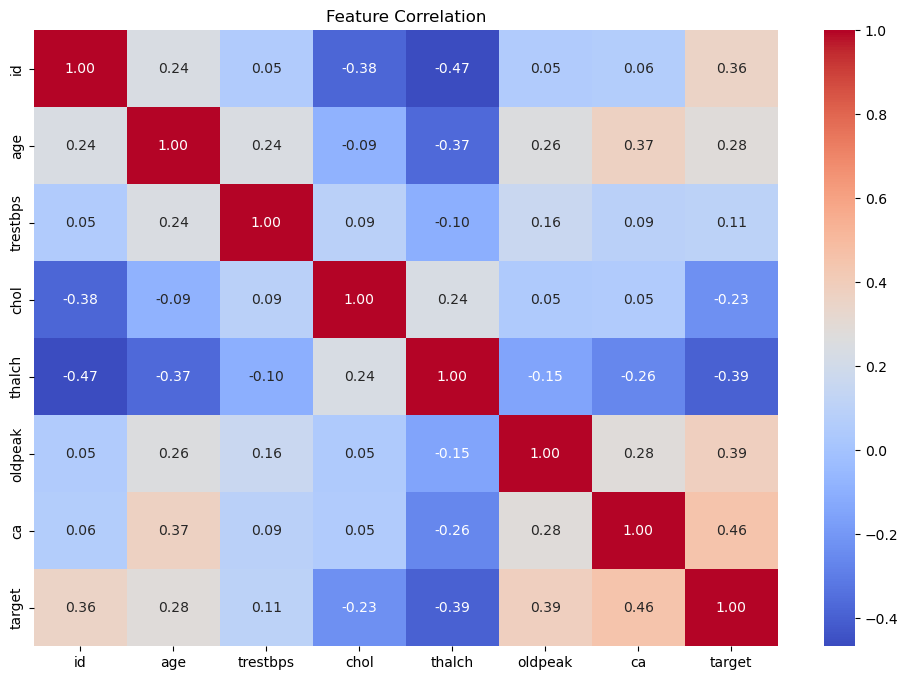

In [44]:
# Correlation Heatmap

plt.figure(figsize=(12, 8))

numeric_cols = Data.select_dtypes(include=[np.number])

# Plot heatmap
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation')
plt.show()



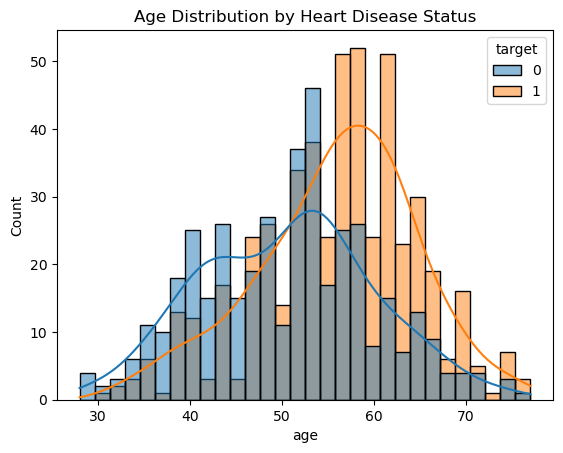

In [46]:
# Feature vs Target

sns.histplot(data=Data, x='age', hue='target', kde=True, bins=30)
plt.title('Age Distribution by Heart Disease Status')
plt.show()


# Preprocess and Split Data

In [49]:
# Features and label
X = Data.drop('target', axis=1)
y = Data['target']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
Data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

# Train Logistic Regression

In [60]:

# Create imputer for numeric features
imputer = SimpleImputer(strategy='mean')

# Fit and transform X
X = imputer.fit_transform(X)

# Now continue as before:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# Evaluation

Accuracy: 0.8206521739130435


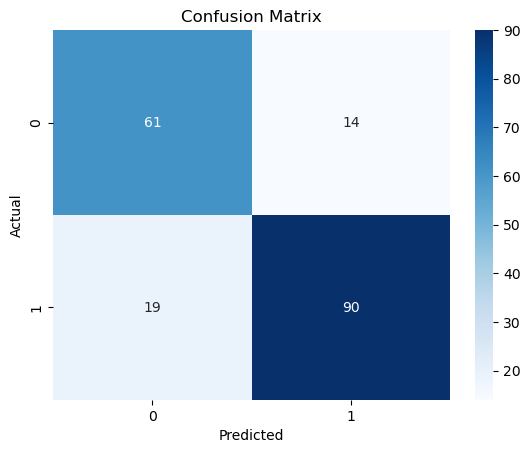

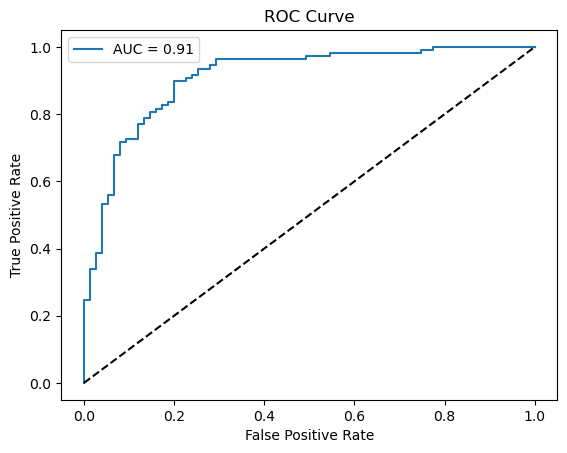

In [63]:

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [67]:

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Confusion Matrix:
[[61 14]
 [19 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        75
           1       0.87      0.83      0.85       109

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184


ROC AUC Score: 0.9098470948012233
